# LLM Validation - Llama 3 70B
In this experiment, we experiment with a more powerful, larger model to see if it produces better classification results than less powerful models. We use Groq AI, which has generous rate limits and allows for insanely fast inference.

In [9]:
from groq import Groq
import pandas as pd

**Define inference function**

In [ ]:
client = Groq(
    api_key="",
)

In [13]:
def label_abstract(x):
    prompt = f'''I will paste an abstract from a research article. I want you
            to respond "1" if the abstract comes from a paper in the computer science field, and "0"
            if it doesn't or if you are not sure. Do not include anything else in your response; just
            the number. Please classify this abstract: {x}'''
    chat_completion = client.chat.completions.create(
        messages=[
            {
                "role": "user",
                "content": prompt,
            }
        ],
        model="llama3-70b-8192",
    )
    return int(chat_completion.choices[0].message.content)

**Import data and run the model**:

In [14]:
df = pd.read_csv("data/text-classification-train.csv")
df.head()

,ID,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,1,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific inf...,1,0,0,0,0,0
1,2,Rotation Invariance Neural Network,Rotation invariance and translation invarian...,1,0,0,0,0,0
2,3,Spherical polyharmonics and Poisson kernels fo...,We introduce and develop the notion of spher...,0,0,1,0,0,0
3,4,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LL...,0,0,1,0,0,0
4,5,Comparative study of Discrete Wavelet Transfor...,Fourier-transform infra-red (FTIR) spectra o...,1,0,0,1,0,0


In [15]:
df_labeled = pd.DataFrame()
df_labeled["abstract"] = df["ABSTRACT"][:200]
df_labeled["CS_actual"] = df["Computer Science"][:200]
df_labeled

,abstract,CS_actual
0,Predictive models allow subject-specific inf...,1
1,Rotation invariance and translation invarian...,1
2,We introduce and develop the notion of spher...,0
3,The stochastic Landau--Lifshitz--Gilbert (LL...,0
4,Fourier-transform infra-red (FTIR) spectra o...,1
...,...,...
195,We relate the concepts used in decentralized...,0
196,Time-varying network topologies can deeply i...,1
197,A long-standing obstacle to progress in deep...,1
198,We study the band structure topology and eng...,0


In [18]:
# Chunk 1 (test)
df_labeled['Llama3_70B_CS'][:5] = df_labeled['abstract'][:5].apply(label_abstract)

C:\Users\aharve\AppData\Local\Temp\ipykernel_17564\1054694634.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_labeled['Llama3_70B_CS'][:5] = df_labeled['abstract'][:5].apply(label_abstract)
C:\Users\aharve\AppData\Local\Temp\ipykernel

In [20]:
# Chunk 2
df_labeled['Llama3_70B_CS'][5:20] = df_labeled['abstract'][5:20].apply(label_abstract)

C:\Users\aharve\AppData\Local\Temp\ipykernel_17564\2420500894.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_labeled['Llama3_70B_CS'][5:20] = df_labeled['abstract'][5:20].apply(label_abstract)


In [21]:
# Chunk 3
df_labeled['Llama3_70B_CS'][20:40] = df_labeled['abstract'][20:40].apply(label_abstract)

C:\Users\aharve\AppData\Local\Temp\ipykernel_17564\2481692242.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_labeled['Llama3_70B_CS'][20:40] = df_labeled['abstract'][20:40].apply(label_abstract)


In [22]:
df_labeled['Llama3_70B_CS'][40:60] = df_labeled['abstract'][40:60].apply(label_abstract)

C:\Users\aharve\AppData\Local\Temp\ipykernel_17564\1209347954.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_labeled['Llama3_70B_CS'][40:60] = df_labeled['abstract'][40:60].apply(label_abstract)


In [23]:
df_labeled['Llama3_70B_CS'][60:80] = df_labeled['abstract'][60:80].apply(label_abstract)

C:\Users\aharve\AppData\Local\Temp\ipykernel_17564\136279750.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_labeled['Llama3_70B_CS'][60:80] = df_labeled['abstract'][60:80].apply(label_abstract)


In [25]:
df_labeled['Llama3_70B_CS'][80:100] = df_labeled['abstract'][80:100].apply(label_abstract)

C:\Users\aharve\AppData\Local\Temp\ipykernel_17564\2970635596.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_labeled['Llama3_70B_CS'][80:100] = df_labeled['abstract'][80:100].apply(label_abstract)


In [26]:
df_labeled['Llama3_70B_CS'][100:120] = df_labeled['abstract'][100:120].apply(label_abstract)

C:\Users\aharve\AppData\Local\Temp\ipykernel_17564\1287123102.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_labeled['Llama3_70B_CS'][100:120] = df_labeled['abstract'][100:120].apply(label_abstract)


In [27]:
df_labeled['Llama3_70B_CS'][120:140] = df_labeled['abstract'][120:140].apply(label_abstract)

C:\Users\aharve\AppData\Local\Temp\ipykernel_17564\1196345211.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_labeled['Llama3_70B_CS'][120:140] = df_labeled['abstract'][120:140].apply(label_abstract)


In [28]:
df_labeled['Llama3_70B_CS'][140:160] = df_labeled['abstract'][140:160].apply(label_abstract)

C:\Users\aharve\AppData\Local\Temp\ipykernel_17564\3142243585.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_labeled['Llama3_70B_CS'][140:160] = df_labeled['abstract'][140:160].apply(label_abstract)


In [29]:
df_labeled['Llama3_70B_CS'][160:180] = df_labeled['abstract'][160:180].apply(label_abstract)

C:\Users\aharve\AppData\Local\Temp\ipykernel_17564\3687364988.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_labeled['Llama3_70B_CS'][160:180] = df_labeled['abstract'][160:180].apply(label_abstract)


In [30]:
df_labeled['Llama3_70B_CS'][180:200] = df_labeled['abstract'][180:200].apply(label_abstract)

C:\Users\aharve\AppData\Local\Temp\ipykernel_17564\1774564994.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_labeled['Llama3_70B_CS'][180:200] = df_labeled['abstract'][180:200].apply(label_abstract)


In [31]:
df_labeled.to_csv("llama3_70b_experiment.csv")

### Evaluating Llama3 70B

In [40]:
df_labeled = pd.read_csv("data/llama3_70b_experiment.csv")
df_labeled.head()

,abstract,CS_actual,Llama3_70B_CS
0,Predictive models allow subject-specific inf...,1,1
1,Rotation invariance and translation invarian...,1,1
2,We introduce and develop the notion of spher...,0,0
3,The stochastic Landau--Lifshitz--Gilbert (LL...,0,0
4,Fourier-transform infra-red (FTIR) spectra o...,1,1


<Axes: >

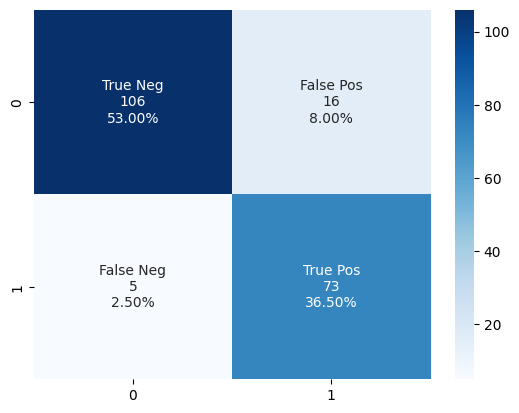

In [35]:
# Source: https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea

from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

cm = confusion_matrix(df_labeled['CS_actual'], df_labeled['Llama3_70B_CS'])

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cm, annot=labels, fmt="", cmap='Blues')

In [36]:
tn = cm[0][0]
fp = cm[0][1]
fn = cm[1][0]
tp = cm[1][1]

# Accuracy: the percent of correctly classified data
accuracy = (tn+tp)/(tn+fp+fn+tp)
accuracy

0.895

In [37]:
# Precision: positive predictive value; of those predicted as CS documents, how many were actually CS documents?
precision = (tp)/(tp+fp)
precision

0.8202247191011236

In [38]:
# Recall: of those that were actually CS documents, how many were predicted as CS documents?
recall = (tp)/(tp+fn)
recall

0.9358974358974359

In [39]:
    # F1 score: tries to balance precision and recall, with uneven class distribution (large number of actual negs)
    f1 = 2*((precision*recall)/(precision+recall))
    f1

0.874251497005988

This is the best model so far! It scores better than in-context learning Llama 3 8B on virtually every metric: higher accuracy (84% vs. 89.5%), higher precision (74% vs. 82%), higher recall (91% vs. 93%), and a higher F1-score (0.81 vs. 0.87). It shows that more powerful models will probably classify documents better, similar to how more powerful, larger embedding models did better than smaller ones. Notably, inference in this experiment was also incredibly fast, since I used Groq AI, which has pretty generous rate limits.

### Qualitative analysis

This model misclassified 21 documents in the dataset, representing around ~10% of the dataset. We will now see what mistakes it makes. Previous qualitative analysis has yielded that many consistently 